In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pyslaw.lineartheory import LinearModel

# On the relation between the apparent wavelength and the wave spectrum

TODO:
- Add short description here (include author?)

Flow parameters

In [3]:
U = 10   # Wind speed [m/s]
N = 0.01 # Brunt-Vaisala frequency [1/s]

Hill shape

In [4]:
L = 1000.0   # Characteristic width of the hill [m]
hmax = 100.0 # Height of the hill [m]

# Shape function of the hill
h = lambda x: hmax/(1+(x/L)**2)

Numerical parameters

In [5]:
Lx = 2000.0e3 # Length of the numerical domain [m]
Nx = int(1e5) # Number of grid points

## Solve flow problem

Create numerical grid

In [6]:
xs,dx = np.linspace(-Lx/2,Lx/2,Nx,endpoint=False,retstep=True)
print('Horizontal grid resolution is {} m'.format(dx))

Horizontal grid resolution is 20.0 m


In [7]:
model1 = LinearModel(xs,h(xs),U,N)
model2 = LinearModel(xs,h(xs),1.5*U,N)

In [8]:
w1 = model1.solve('w',6000)
w2 = model2.solve('w',6000)

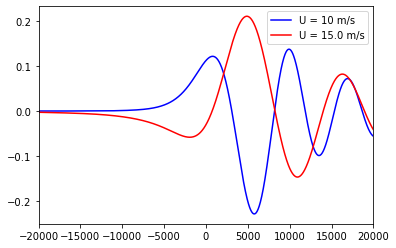

In [9]:
plt.plot(xs,w1,'-b',label='U = {} m/s'.format(U))
plt.plot(xs,w2,'-r',label='U = {} m/s'.format(1.5*U))
plt.xlim([-20e3,20e3])
plt.legend()

In [10]:
lambda_eff1 = np.abs(xs[np.argmin(w1)]-xs[np.argmax(w1)])
lambda_eff2 = np.abs(xs[np.argmin(w2)]-xs[np.argmax(w2)])
print('Effective wavelength (distance between crest and trough):')
print('at U = {} m/s, lambda = {} km'.format(U,lambda_eff1/1e3))
print('at U = {} m/s, lambda = {} km'.format(1.5*U,lambda_eff2/1e3))

Effective wavelength (distance between crest and trough):
at U = 10 m/s, lambda = 4.16 km
at U = 15.0 m/s, lambda = 6.04 km


In [11]:
print('Cut-off wavenumber above which waves become evanescent:')
print('at U = {} m/s, kc = {:.3} km'.format(U,2*np.pi*U/(N*1e3)))
print('at U = {} m/s, kc {:.3} km'.format(1.5*U,2*np.pi*1.5*U/(N*1e3)))

Cut-off wavenumber above which waves become evanescent:
at U = 10 m/s, kc = 6.28 km
at U = 15.0 m/s, kc 9.42 km


(0.0, 0.005)

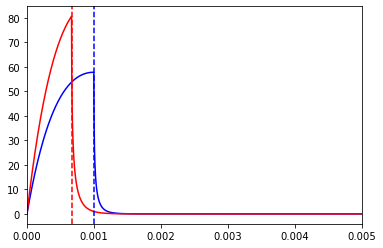

In [12]:
dx = np.unique(np.diff(xs))
k = 2.0 * np.pi * np.fft.rfftfreq(xs.size,dx)
plt.plot(k,np.abs(np.fft.rfft(w1)),'-b')
plt.plot(k,np.abs(np.fft.rfft(w2)),'-r')
plt.axvline(N/U,linestyle='--',color='b')
plt.axvline(N/(1.5*U),linestyle='--',color='r')
plt.xlim([0,0.005])

Remaining question: How does effective wave length relate to the wave spectrum? 